Version 2024-01-16, Arvid Lundervold


[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219/blob/main/Lab3-GenAI/lab3-genAI-nlp-explore.ipynb)


# Lab 3 Generative AI - NLP explore (GPT-2)

We here assume PyTorch and the [transformers](https://huggingface.co/docs/transformers/index) library (from Hugging Face, which provides easy access to pre-trained models and their tokenizers) are installed, if not, run the following cell:

```python
!pip install torch
!pip install transformers
```

To find the Token ID of the word "patient" in a GPT model using Python, you would typically use a tokenizer compatible with the GPT model. One of the most common libraries for this purpose is Hugging Face's Transformers library, which provides easy access to pre-trained models and their tokenizers.

Here's a Python code snippet that demonstrates how to find the Token ID for "patient" using the GPT-2 tokenizer:

In [4]:
from transformers import GPT2Model, GPT2Tokenizer
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
def get_token_id(word):
    # Load the tokenizer for GPT-2
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

    # Encode the word to get its Token ID
    token_id = tokenizer.encode(word, add_special_tokens=False)

    return token_id

# Example usage
word = "patient"
token_id = get_token_id(word)
print(f"Token ID for '{word}': {token_id}\n")


for word in ["The", "patient", "has", "a", "fever", "."]:
    token_id = get_token_id(word)
    print(f"Token ID for '{word}': {token_id}") 


Token ID for 'patient': [26029]

Token ID for 'The': [464]
Token ID for 'patient': [26029]
Token ID for 'has': [10134]
Token ID for 'a': [64]
Token ID for 'fever': [69, 964]
Token ID for '.': [13]


To retrieve the embedding vector for a specific token (like "patient" with Token ID 26029) in a model like GPT-2, you need to access the model's embedding layer. This layer maps each Token ID to a high-dimensional vector, which represents the token in the model's learned feature space.

Here's how you can retrieve the embedding vector for the word "patient" in GPT-2 using Python and the Hugging Face Transformers library:

In [6]:
def get_embedding_vector(word):
    # Load the tokenizer and model for GPT-2
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2Model.from_pretrained("gpt2")

    # Encode the word to get its Token ID
    token_id = tokenizer.encode(word, add_special_tokens=False)

    # Retrieve the embedding for the Token ID
    embeddings = model.get_input_embeddings()
    word_embedding = embeddings(torch.LongTensor(token_id))

    return word_embedding

# Example usage
word = "patient"
embedding_vector = get_embedding_vector(word)
print(f"Embedding vector for '{word}': {embedding_vector}")


Embedding vector for 'patient': tensor([[-1.2062e-01, -3.6002e-01,  1.5080e-01, -9.3105e-02, -6.0587e-02,
         -2.5183e-01, -3.5659e-01, -1.8158e-01, -2.6167e-01,  8.3643e-02,
          3.1463e-01,  2.2771e-01,  4.7810e-03, -1.3722e-01, -2.8546e-02,
         -8.3280e-02, -4.7087e-02, -1.6795e-01,  7.5017e-03,  8.9747e-02,
         -1.5150e-01,  1.1515e-01,  1.2865e-01, -1.0377e-01, -1.1852e-01,
         -1.0153e-01,  1.2508e-01, -1.3948e-01, -4.8302e-02,  9.5049e-02,
         -2.9984e-02, -4.5584e-02,  3.0392e-02, -1.2178e-03, -6.5477e-02,
          7.5003e-02, -3.1934e-01, -1.2183e-02,  2.3057e-01,  7.4451e-02,
         -3.0815e-01, -6.5707e-02,  1.4448e-01, -1.9877e-02, -7.7836e-02,
          1.1676e-01,  1.0865e-02, -1.6200e-01, -2.0710e-01, -2.1135e-01,
         -1.4299e-01,  9.1997e-02,  1.2531e-01, -4.3654e-02,  4.0772e-02,
         -3.0279e-01,  7.5637e-02, -1.2184e-01,  1.0579e-01,  7.6688e-02,
         -1.2078e-01, -4.7883e-02, -3.6084e-03,  6.2679e-02,  3.9213e-01,
      

Keep in mind that the embedding vector is a high-dimensional tensor (usually several hundred dimensions), and its values are learned during the model's training process. The specific values in this vector capture semantic and syntactic information about the word as learned by the model from its training data.

## Side step: From color name embeddings to Patient Similarity Networks

In [7]:
# Load the tokenizer and model for GPT-2
#tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
#model = GPT2Model.from_pretrained("gpt2")

# Define a list of 10 colors   
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'white', 'black']


In [9]:
for word in colors:
    token_id = get_token_id(word)
    print(f"TokenID for '{word}': {token_id}")

TokenID for 'red': [445]
TokenID for 'green': [14809]
TokenID for 'blue': [17585]
TokenID for 'yellow': [36022]
TokenID for 'orange': [43745]
TokenID for 'purple': [14225, 1154]
TokenID for 'pink': [79, 676]
TokenID for 'brown': [33282]
TokenID for 'white': [11186]
TokenID for 'black': [13424]


In [17]:
# Make a function that returns the embedding vector (as a numpy array) for a color name
def get_color_embedding(color_name):
    # Load the tokenizer and model for GPT-2
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2Model.from_pretrained("gpt2")

    # Encode the color word to get its Token ID
    color_id = tokenizer.encode(color_name, add_special_tokens=False)

    # Retrieve the embedding for the Token ID
    embeddings = model.get_input_embeddings()
    color_embedding = embeddings(torch.LongTensor(color_id))

    #return color_embedding
    # Convert the embedding to a numpy array
    color_embedding_np = color_embedding.detach().numpy()

    return color_embedding_np

# Example usage
my_colors = ["red", "green"]
for i, color in enumerate(my_colors):
    color_embedding = get_color_embedding(color)
    print(f"Embedding vector (first five components) for '{color}': {color_embedding[0,:5]}")


Embedding vector (first five components) for 'red': [-0.2847387  -0.01288451  0.32659984 -0.1310864  -0.0966469 ]
Embedding vector (first five components) for 'green': [ 0.01073372 -0.12655787  0.11800737 -0.2804615  -0.17936078]


In [18]:
# Make an embedding vector space for colors
color_embeddings = np.zeros((len(colors), 768))

for i, color in enumerate(colors):
    color_embedding = get_color_embedding(color)
    if color_embedding.shape != (768,):
        color_embedding = color_embedding[0]  # *) or some other appropriate index
    color_embeddings[i,:] = color_embedding

# *) Hack to bypass: ValueError: could not broadcast input array from shape(2,768) into shape(768,)
    
# Print the shape of the color embeddings
print(f"Shape of color embeddings: {color_embeddings.shape}")


Shape of color embeddings: (10, 768)


In [19]:
def cosine_similarity_np(vector1, vector2):

    # Normalize the vectors to unit vectors
    vector1_norm = vector1 / np.linalg.norm(vector1)
    vector2_norm = vector2 / np.linalg.norm(vector2)

    # Compute the cosine similarity
    cos_sim = np.dot(vector1_norm, vector2_norm)

    return cos_sim

In [20]:
# Make a similarity matrix for the colors using cosine similarity

# Initialize the similarity matrix with zeros
similarity_matrix = np.zeros((len(colors), len(colors)))

# Loop over all pairs of color embeddings
for i in range(len(colors)):
    for j in range(i+1, len(colors)):
        # Get the color embedding vectors
        color_i = color_embeddings[i,:]
        color_j = color_embeddings[j,:]

        # Compute the similarity between the two color embeddings
        sim = cosine_similarity_np(color_i, color_j)

        # Store the similarity in the similarity matrix
        similarity_matrix[i,j] = sim
        similarity_matrix[j,i] = sim  # use symmetry to avoid redundant computation

# Print the similarity matrix to three decimal points and print colot names before each row
        
# Set print options
np.set_printoptions(precision=3, suppress=True)   
print(f"Similarity matrix: {similarity_matrix.shape}")
for i, color in enumerate(colors):
    print(f"{color}:\t {similarity_matrix[i,:]}")

# Reset precision and suppress options to default
np.set_printoptions(precision=8, suppress=False)


Similarity matrix: (10, 10)
red:	 [0.    0.377 0.455 0.465 0.388 0.332 0.247 0.392 0.36  0.385]
green:	 [0.377 0.    0.582 0.586 0.564 0.387 0.271 0.557 0.505 0.512]
blue:	 [0.455 0.582 0.    0.588 0.583 0.371 0.283 0.512 0.516 0.557]
yellow:	 [0.465 0.586 0.588 0.    0.65  0.415 0.246 0.612 0.579 0.543]
orange:	 [0.388 0.564 0.583 0.65  0.    0.4   0.235 0.592 0.494 0.497]
purple:	 [0.332 0.387 0.371 0.415 0.4   0.    0.383 0.373 0.318 0.314]
pink:	 [0.247 0.271 0.283 0.246 0.235 0.383 0.    0.249 0.294 0.295]
brown:	 [0.392 0.557 0.512 0.612 0.592 0.373 0.249 0.    0.546 0.558]
white:	 [0.36  0.505 0.516 0.579 0.494 0.318 0.294 0.546 0.    0.669]
black:	 [0.385 0.512 0.557 0.543 0.497 0.314 0.295 0.558 0.669 0.   ]


In a Patient Similarity Network, the use of cosine similarity can be both reasonable and effective, depending on the nature of the data and the specific objectives of the analysis. Let's explore the pros and cons:

### Pros:

1. **High-Dimensional Data:** Cosine similarity is particularly useful for high-dimensional data, which is common in medical datasets (e.g., genomics, electronic health records). It measures the cosine of the angle between two vectors, making it a good choice for comparing patients in terms of their features' orientations rather than magnitudes.

2. **Normalization:** Since cosine similarity inherently normalizes the data (by considering the angle between vectors), it can be effective when the magnitude of data points is less important. This is useful in cases where you're more interested in the pattern of data (like presence or absence of certain conditions) rather than the absolute values.

3. **Sparse Data:** In medical datasets, where you might have a lot of zero values (indicating the absence of a condition or symptom), cosine similarity can be more meaningful than other distance metrics like Euclidean distance.

### Cons:

1. **Sensitivity to Data Distribution:** Cosine similarity might not be the best choice if the magnitude of features is important. For instance, in cases where the severity of symptoms or the dosage of medication is crucial, the normalization aspect of cosine similarity might overlook these factors.

2. **Interpretability:** In clinical settings, interpretability is key. While cosine similarity can provide a measure of similarity, it might not always translate into clinically meaningful insights without additional context or analysis.

3. **Outliers and Variability:** Cosine similarity may not adequately handle outliers or high variability in certain features, which can be common in medical data due to individual patient differences.

### Application in Patient Similarity Networks:

- **Clustering and Classification:** Cosine similarity can be used to cluster patients into groups based on similarities in their medical profiles, which can be useful for identifying subtypes of diseases or predicting disease progression.

- **Personalized Medicine:** It can help in recommending personalized treatment plans by finding patients with similar medical histories or response patterns to treatments.

- **Anomaly Detection:** In some cases, identifying patients who are significantly dissimilar from others (using cosine dissimilarity) can be useful for detecting anomalies or rare conditions.

### Conclusion:

Cosine similarity can be a valuable tool in constructing Patient Similarity Networks, especially for high-dimensional, pattern-oriented analyses. However, it's important to consider the specific characteristics of the medical data and the clinical questions at hand. In some cases, combining cosine similarity with other metrics or incorporating domain-specific adjustments can lead to more robust and clinically relevant insights.

In the context of patient lab-test profiles, cosine similarity provides a measure of how similar the orientation or direction of two data vectors (representing patients) is in a multi-dimensional space (each dimension representing a lab-test). Let's consider the two scenarios you mentioned:

1. **Two Patients with Almost the Same Lab-Test Values:**
   - If two patients have almost identical values across a large set of lab tests, their corresponding vectors in the multi-dimensional lab-test space will be very similar in direction.
   - The angle between these two vectors will be very small, approaching zero degrees.
   - Cosine similarity, which is the cosine of the angle between two vectors, will be close to 1 in this case, indicating a very high degree of similarity.

2. **Two Patients with Very Different Lab-Test Profiles:**
   - If the lab-test values are very different for two patients, their vectors in the lab-test space will point in significantly different directions.
   - The angle between these vectors will be larger, potentially approaching 90 degrees or more.
   - The cosine of a larger angle decreases, moving towards 0 or even becoming negative if the vectors are in opposite quadrants of the space. A cosine similarity close to 0 or negative indicates a low degree of similarity.

### Key Takeaway:

- **High Cosine Similarity (Close to 1):** Indicates that the patients' lab-test profiles are very similar in terms of the pattern of results, regardless of the magnitude of those results.
- **Low or Negative Cosine Similarity:** Suggests that the patients' lab-test profiles are quite different.

It's important to note that cosine similarity focuses on the pattern or orientation of the data in the feature space, rather than the magnitude. This means that even if two patients have lab values that are proportionally similar but different in magnitude (e.g., one patient's values are consistently twice as high as the other's), they could still have a high cosine similarity. This characteristic should be considered when interpreting the results in a clinical context.

In [24]:
import matplotlib.colors as mcolors

color_names = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'white', 'black']
valid_color_codes = []

for color in color_names:
    if color in mcolors.CSS4_COLORS:
        # The color name is a valid Matplotlib color
        valid_color_codes.append(color)
    else:
        # Handle invalid color names if necessary
        print(f"'{color}' is not a recognized Matplotlib color.")

print("Valid Matplotlib color codes:", valid_color_codes)


Valid Matplotlib color codes: ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'white', 'black']


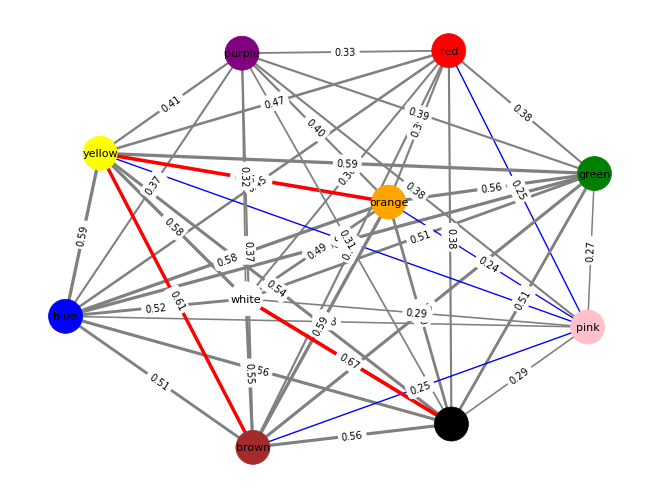

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def create_patient_similarity_graph(patient_names, similarity_matrix):
    # Create a graph
    G = nx.Graph()

    # Add nodes
    for patient in patient_names:
        G.add_node(patient)

    # Prepare lists for edge attributes
    edge_colors = []
    edge_widths = []
    edge_labels = {}  # Define edge_labels dictionary

    # Add edges based on similarity matrix
    num_patients = len(patient_names)
    for i in range(num_patients):
        for j in range(i+1, num_patients):
            similarity = similarity_matrix[i][j]
            dissimilarity = 1 - similarity  # Convert similarity to dissimilarity
            #dissimilarity = 1.0 / similarity if similarity != 0 else 1.0
            G.add_edge(patient_names[i], patient_names[j], weight=similarity)
            edge_widths.append(similarity*4)  # Scale edge width by similarity
            
            # Three-branched decision for edge color
            if similarity > 0.6:
                edge_colors.append('red')
            elif similarity < 0.25:
                edge_colors.append('blue')
            else:
                edge_colors.append('gray')

            # Add edge label
            edge_labels[(patient_names[i], patient_names[j])] = f'{similarity:.2f}'

    # Draw the graph with spring layout
    pos = nx.spring_layout(G, weight=similarity, seed=42)  # Use the edge weight for layout

    # Use patient names as colors for the nodes
    node_colors = [patient for patient in patient_names]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, 
            node_size=600, edge_color=edge_colors, width=edge_widths, # edge_colors, width=edge_widths, 
            linewidths=0.5, font_size=8)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Show the plot
    plt.show()

    return G

# Example usage
patient_names = ['red', 'green', 'blue', 'yellow', 'orange', 
                 'purple', 'pink', 'brown', 'white', 'black']

# Create a 10x10 matrix with random similarity values between 0 and 1
# similarity_matrix = [[random.random() for _ in range(len(patient_names))] for _ in range(len(patient_names))]

G = create_patient_similarity_graph(patient_names, similarity_matrix)



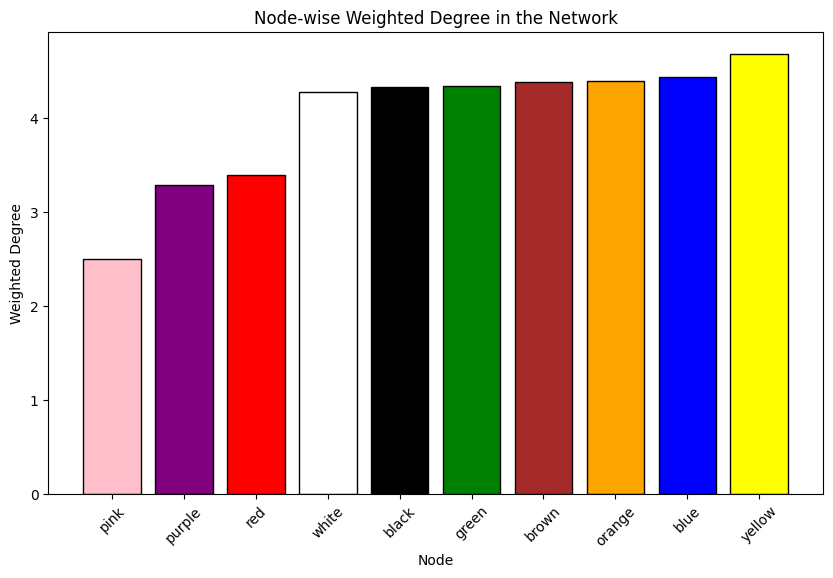

In [40]:
# Calculate weighted node degrees
weighted_degrees = {n: sum(weight for _, _, weight in G.edges(n, data='weight')) for n in G.nodes()}

# Sort the nodes by name for consistent plotting
#sorted_nodes = sorted(G.nodes())

# Sort the nodes by their weighted degree
sorted_nodes.sort(key=lambda n: weighted_degrees[n])

sorted_weights = [weighted_degrees[node] for node in sorted_nodes]

# Create the bar plot and color the bars according to node color
node_colors = [node for node in sorted_nodes]
plt.figure(figsize=(10, 6))
plt.bar(sorted_nodes, sorted_weights, color=node_colors, edgecolor='black')
plt.xlabel('Node')
plt.ylabel('Weighted Degree')
plt.title('Node-wise Weighted Degree in the Network')
plt.xticks(rotation=45)
plt.show()
